In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '/Users/ammar.tareen/Desktop/Research_projects/mavenn2/')

import mavenn
import logomaker
import seaborn as sns
import re

%matplotlib inline

In [2]:
#!pip install tensorflow
#!pip list | grep tensorflow
#!pip install scikit-learn
#!pip install seaborn

In [3]:
# Load example data
full_wt_df = pd.read_csv('data/sortseq/full-wt/data.txt',delim_whitespace=True)
rnap_wt_df = pd.read_csv('data/sortseq/rnap-wt/data.txt',delim_whitespace=True)
crp_wt_df = pd.read_csv('data/sortseq/crp-wt/data.txt',delim_whitespace=True)

# # Separate test from data_df
# ix_test = data_df['set']=='test'
# test_df = data_df[ix_test].reset_index(drop=True)
# print(f'test N: {len(test_df):,}')

# # Remove test data from data_df
# data_df = data_df[~ix_test].reset_index(drop=True)
# print(f'training + validation N: {len(data_df):,}')


In [4]:
#data_df = full_wt_df.merge(rnap_wt_df,on='seq',how='outer').merge(crp_wt_df,on='seq',how='outer').fillna(0)
data_df = full_wt_df.copy()

In [5]:
data_df

,seq,ct_0,ct_1,ct_2,ct_3,ct_4,ct_5,ct_6,ct_7,ct_8,ct_9
0,AAAAAAAGTGAGTTAGCCAACTAATTAGGCACCGTACGCTTTATAG...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AAAAAATCTGAGTTAGCTTACTCATTAGGCACCCCAGGCTTGACAC...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,AAAAAATCTGAGTTTGCTCACTCTATCGGCACCCCAGTCTTTACAC...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,AAAAAATGAGAGTTAGTTCACTCATTCGGCACCACAGGCTTTACAA...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,AAAAAATGGGTGTTAGCTCTATCATTAGGCACCCCCGGCTTTACAC...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
50513,TTTTGCAGAGTGTCAGCCCACTCATTACGCACCGCAGCCGTTACAC...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
50514,TTTTTATGTGAGTTAGCTCACTCATTCGGCACCCTAGGCTTTACAC...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
50515,TTTTTATGTGAGTTTGCTCACTCATGTGGCACCTAAGGCTTTACGC...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
50516,TTTTTATGTGGGTTAGGTCGCGCATTAGGCACCGCAGGCTTTACCC...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
y_cols = list(np.arange(0,10,1).astype(str))
cols = list(np.arange(0,10,1).astype(str))
cols.insert(0,'x')
data_df.columns = cols

In [7]:
X = data_df['x']
y = data_df[y_cols]

In [8]:
from sklearn.model_selection import train_test_split

# split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [9]:
# from mavenn.src.layers.gpmap import GPMapLayer


# # Tensorflow imports
# import tensorflow as tf
# import tensorflow.keras.backend as K
# from tensorflow.keras.initializers import Constant
# from tensorflow.keras.layers import Layer, Dense

# class ThermodynamicLayer(GPMapLayer):
#     """Represents an thermodynamic model of transcription
#        regulation in E. Coli at the xylE promoter, which 
#        contains binding sites for RNAP, CRP, and xylR.
#     """

#     def __init__(self, 
#                  CRP_start,
#                  CRP_end,
#                  xylR_start,
#                  xylR_end,
#                  RNAP_start,
#                  RNAP_end,
#                  regularizer, 
#                  *args, **kwargs):
#         """Construct layer instance."""
        
#         # set attributes
#         self.CRP_start = CRP_start
#         self.CRP_end = CRP_end        

#         self.xylR_start = xylR_start
#         self.xylR_end = xylR_end                        
        
#         self.RNAP_start = RNAP_start
#         self.RNAP_end = RNAP_end        
        
#         #self.C=kwargs['C']
#         self.C=4
#         self.regularizer = tf.keras.regularizers.L2(regularizer)
        
#         # form helpful variables
#         self.L_CRP = CRP_end-CRP_start
#         self.L_RNAP = RNAP_end - RNAP_start
#         self.L_xylR = xylR_end - xylR_start
        
#         super().__init__(*args, **kwargs)

#     def build(self, input_shape):
#         """Build layer."""
        
#         #1 define bias/chemical potential weight for crp
#         self.mu_CRP = self.add_weight(name='mu_CRP',
#                                        shape=(1,),
#                                        initializer=Constant(0.),
#                                        trainable=True,
#                                        regularizer=self.regularizer)
        
        
#         #2 define bias/chemical potential weight for xylR
#         self.mu_xylR = self.add_weight(name='mu_xylR',
#                                        shape=(1,),
#                                        initializer=Constant(0.),
#                                        trainable=True,
#                                        regularizer=self.regularizer)                   

#         #3 define bias/chemical potential weight for rnap
#         self.mu_RNAP = self.add_weight(name='mu_RNAP',
#                                        shape=(1,),
#                                        initializer=Constant(0.),
#                                        trainable=True,
#                                        regularizer=self.regularizer)
     
        

#         #4 Define theta_CRP_lc parameters
#         theta_CRP_lc_shape = (1, self.L_CRP, self.C)

#         #theta_CRP_lc_init = np.random.randn(*theta_CRP_lc_shape)/np.sqrt(self.L_CRP)
#         self.theta_CRP_lc = self.add_weight(name='theta_CRP_lc',
#                                         shape=theta_CRP_lc_shape,
#                                         #initializer=Constant(CRP_init_values),
#                                         trainable=True,
#                                         regularizer=self.regularizer)

                
#         #5 Define theta_xylR_lc parameters
#         theta_xylR_lc_shape = (1, self.L_xylR, self.C)

#         #theta_xylR_lc_init = np.random.randn(*theta_xylR_lc_shape)/np.sqrt(self.L_xylR)
#         self.theta_xylR_lc = self.add_weight(name='theta_xylR_lc',
#                                         shape=theta_xylR_lc_shape,
#                                         #initializer=Constant(xylR_init_values),
#                                         trainable=True,
#                                         regularizer=self.regularizer)        
        
#         #6 Define theta_rnap_lc parameters
#         theta_RNAP_lc_shape = (1, self.L_RNAP, self.C)

#         #theta_RNAP_lc_init = np.random.randn(*theta_RNAP_lc_shape)/np.sqrt(self.L_RNAP)
#         self.theta_RNAP_lc = self.add_weight(name='theta_RNAP_lc',
#                                         shape=theta_RNAP_lc_shape,
#                                         #initializer=Constant(RNAP_init_values),
#                                         trainable=True,
#                                         regularizer=self.regularizer)

        
#         #7 define interaction term between CRP and xylR
#         self.I_cx = self.add_weight(name='I_cx',
#                                shape=(1,),
#                                initializer=Constant(-1),
#                                trainable=True)
        
#         #8 define interaction term between RNAP and xylR. 
#         self.I_rx = self.add_weight(name='I_rx',
#                                shape=(1,),
#                                initializer=Constant(-1),
#                                trainable=True,
#                                regularizer=self.regularizer)
        
# #         #9 define interaction term between CRP and RNAP
# #         self.I_cr = self.add_weight(name='I_cr',
# #                                shape=(1,),
# #                                initializer=Constant(-1),
# #                                trainable=True)        
        
# #         #10 define tsat term. 
#         self.tsat = self.add_weight(name='tsat',
#                                shape=(1,),
#                                initializer=Constant(1.),
#                                trainable=False)        
        
#         # Call superclass build
#         super().build(input_shape)

#     def call(self, x_lc):
#         """Process layer input and return output.
        
#         x_lc: (tensor)
#             Input tensor that represents one-hot encoded 
#             sequence values. 
#         """
        
#         # extract locations of binding sites from entire lac-promoter sequence.
#         x_CRP_lc = x_lc[:,self.C * self.CRP_start:self.C * self.CRP_end]
#         x_xylR_lc = x_lc[:,self.C * self.xylR_start: self.C * self.xylR_end]
#         x_RNAP_lc = x_lc[:,self.C * self.RNAP_start: self.C * self.RNAP_end]
        
#         # reshape according to crp and rnap lengths. 
#         x_CRP_lc = tf.reshape(x_CRP_lc, [-1, self.L_CRP, self.C])
#         x_xylR_lc = tf.reshape(x_xylR_lc, [-1, self.L_xylR, self.C])        
#         x_RNAP_lc = tf.reshape(x_RNAP_lc, [-1, self.L_RNAP, self.C])

                
#         # compute delta G for crp    
#         phi_CRP = self.mu_CRP + \
#               tf.reshape(K.sum(self.theta_CRP_lc * x_CRP_lc, axis=[1, 2]),
#                          shape=[-1, 1])
            
#         # compute delta G for LacI
#         phi_xylR = self.mu_xylR + \
#               tf.reshape(K.sum(self.theta_xylR_lc * x_xylR_lc, axis=[1, 2]),
#                          shape=[-1, 1])                             
            
#         # compute delta G for rnap
#         phi_RNAP = self.mu_RNAP + \
#               tf.reshape(K.sum(self.theta_RNAP_lc * x_RNAP_lc, axis=[1, 2]),
#                          shape=[-1, 1])                   
        
#         # partition function
#         Z = (1+K.exp(-phi_CRP)+K.exp(-phi_xylR)+ \
#              K.exp(-phi_RNAP)+ \
#              K.exp(-phi_xylR-phi_RNAP-self.I_rx)+ \
#              #K.exp(-phi_CRP-phi_RNAP-self.I_cr)+ \
#              K.exp(-phi_CRP-phi_RNAP)+ \
#              K.exp(-phi_CRP-phi_xylR-phi_RNAP-self.I_cx-self.I_rx) +\
#              K.exp(-phi_CRP-phi_xylR-self.I_cx)
#             )
        
#         transcription_states =  K.exp(-phi_RNAP)+ \
#                                 K.exp(-phi_xylR-phi_RNAP-self.I_rx)+ \
#                                 K.exp(-phi_CRP-phi_RNAP)+ \
#                                 K.exp(-phi_CRP-phi_xylR-phi_RNAP-self.I_cx-self.I_rx)
        
        
        
#         # compute rate of transcription
#         t = (self.tsat)*(transcription_states)/Z
        
        
#         # return rate of transcription
#         return t

In [10]:
# set positional argumnets for gpmap function
L = len(data_df['x'][0])
alphabet=['A','C','G','T']

#y_cols = data_df.columns[1:-1]
Y = len(y_cols)
print(f'L={L}, Y={Y}')

# get test set data.

L=75, Y=10


In [11]:
y_train.head()

,0,1,2,3,4,5,6,7,8,9
39158,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5329,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22315,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
45507,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2055,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [12]:
# instantiate gpmap object
gpmap = mavenn.gpmap.AdditiveGPMapLayer(L, alphabet)

#therodynamic_gpmap = ThermodynamicLayer(alphabet=alphabet,**gpmap_kwargs)

2022-05-10 13:11:39.761383: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [13]:
bounds_df = pd.read_excel('2022.04.29.SortSeqMP_parameters.xlsx',sheet_name='bounds')
mu_sigma_df = pd.read_excel('2022.04.29.SortSeqMP_parameters.xlsx',sheet_name='mu_signa')
mu_sigma_df

,filename,mean,sigma
0,pos_wt,3.8952,0.351500
1,neg_wt,1.2207,1.116100
2,full_wt,2465.2000,6401.409446
3,crp_wt,1546.0000,4771.210115
4,rnap_wt,4060.0000,7114.645357


In [14]:
bounds_df

,lower_bound,upper_bound
0,0.0000,6.0000
1,0.0000,1.5911
2,1.5911,1.9294
3,1.9345,2.2718
4,2.2742,2.6232
5,2.6243,2.9666
6,2.9671,3.3199
7,3.3201,3.6626
8,3.6627,4.0053
9,4.0053,6.0000


In [15]:
# read in parameters

# number of reads in each bin summed
N_y = np.sum(y,axis=0)

mu_pos = mu_sigma_df[mu_sigma_df['filename'] == 'pos_wt']['mean'].values[0]
sigma_pos = mu_sigma_df[mu_sigma_df['filename'] == 'pos_wt']['sigma'].values[0]

mu_neg = mu_sigma_df[mu_sigma_df['filename'] == 'neg_wt']['mean'].values[0]
sigma_neg = mu_sigma_df[mu_sigma_df['filename'] == 'neg_wt']['sigma'].values[0]

In [16]:
f_y_lower_bounds = bounds_df['lower_bound'].values
f_y_upper_bounds = bounds_df['upper_bound'].values

In [17]:
mu_neg, sigma_neg

(1.2207, 1.1161)

In [18]:
f_y_upper_bounds

array([6.    , 1.5911, 1.9294, 2.2718, 2.6232, 2.9666, 3.3199, 3.6626,
       4.0053, 6.    ])

In [19]:
sortseq_mp = mavenn.measurement_process_layers.SortSeqMP(N_y=N_y,
                                                         Y=Y,
                                                         mu_pos=mu_pos,
                                                         sigma_pos=sigma_pos,
                                                         mu_neg=mu_neg,
                                                         sigma_neg=sigma_neg,
                                                         f_y_lower_bounds=f_y_lower_bounds,
                                                         f_y_upper_bounds=f_y_upper_bounds,
                                                         info_for_layers_dict={'H_y_norm':0},
                                                         eta=1e-5,
                                                         )

In [20]:
model = mavenn.Model2(gpmap=gpmap,
                      mp_list=[sortseq_mp])

In [21]:
model.model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Sequence_labels_input (InputLa  [(None, 310)]       0           []                               
 yer)                                                                                             
                                                                                                  
 Sequence_only (Lambda)         (None, 300)          0           ['Sequence_labels_input[0][0]']  
                                                                                                  
 additive_gp_map_layer (Additiv  (None, 1)           301         ['Sequence_only[0][0]']          
 eGPMapLayer)                                                                                     
                                                                                              

In [22]:
#x_train,y_train
y_train[y_cols[0:10]]

,0,1,2,3,4,5,6,7,8,9
39158,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5329,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22315,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
45507,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2055,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
42853,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
34161,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
20601,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
38258,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [23]:
# Set training data
model.set_data(x=x_train,
               #y_list=[y_train[y_cols[0:10]].values,y_train[y_cols[10:20]].values,y_train[y_cols[20:30]].values],
               y_list = [y_train[y_cols[0:10]].values],
               #validation_flags=(data_df['set']=='validation'),
               shuffle=False)

N = 40,414 observations set as training data.
Using 20.1% for validation.
Time to set data: 0.796 sec.


In [24]:
from tensorflow.keras.utils import plot_model
plot_model(model.model,show_shapes=True,show_dtype=False,dpi=200)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [25]:
#!pip install pydot

In [26]:

# Fit model to data
model.fit(learning_rate=.0001,
          epochs=30,
          batch_size=300,
          try_tqdm = False,
          early_stopping=True,
          early_stopping_patience=10,
          linear_initialization=False)

Epoch 1/30
108/108 [==============================] - 2s 14ms/step - loss: 637525.4375 - I_var: -2275.3501 - val_loss: 578228.8125 - val_I_var: -2010.0897
Epoch 2/30
108/108 [==============================] - 1s 13ms/step - loss: 526113.5625 - I_var: -1878.2432 - val_loss: 479430.6562 - val_I_var: -1666.1648
Epoch 3/30
108/108 [==============================] - 1s 13ms/step - loss: 449795.1875 - I_var: -1604.5732 - val_loss: 423979.6562 - val_I_var: -1473.1290
Epoch 4/30
108/108 [==============================] - 1s 12ms/step - loss: 409361.3125 - I_var: -1460.7540 - val_loss: 395585.5312 - val_I_var: -1374.2814
Epoch 5/30
108/108 [==============================] - 1s 12ms/step - loss: 388504.7500 - I_var: -1385.5726 - val_loss: 380492.1875 - val_I_var: -1321.7355
Epoch 6/30
108/108 [==============================] - 1s 13ms/step - loss: 377172.8750 - I_var: -1345.0806 - val_loss: 371949.6250 - val_I_var: -1291.9948
Epoch 7/30
108/108 [==============================] - 1s 12ms/step - l

On test data:


Text(0.5, 1.0, 'training hisotry')

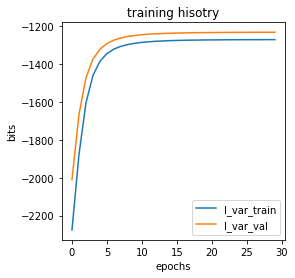

In [27]:
# Show training history
print('On test data:')
# x_test = test_df['x'].values
# y_test = test_df[y_cols].values


I_var_hist = model.history['I_var']
val_I_var_hist = model.history['val_I_var']

fig, ax = plt.subplots(1,1,figsize=[4,4])
ax.plot(I_var_hist, label='I_var_train')
ax.plot(val_I_var_hist, label='I_var_val')
ax.legend()
ax.set_xlabel('epochs')
ax.set_ylabel('bits')
ax.set_title('training hisotry')

In [28]:
phi = gpmap.x_to_phi(x_test)

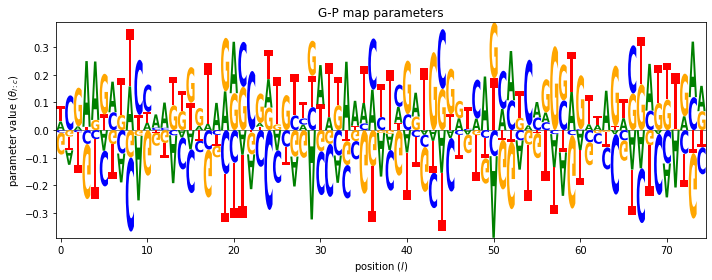

In [29]:
# Get G-P map parameters in matrix form
theta = np.squeeze(gpmap.weights[1].numpy())

# Create grid in phi space
#phi_lim = [-5, 3]
phi_lim = [min(phi), max(phi)]
phi_grid = np.linspace(phi_lim[0], phi_lim[1], 1000)

# Create array of allowable y values
Y = 10    # Y = number of bins
y_lim = [-.5, Y-.5]
y_all = range(Y)

# Compute matrix of p(y|phi) values
#measurement_process = sortseq_mp.p_of_all_y_given_phi(phi).numpy()
# measurement_process_2 = mp_mpa_2.p_of_all_y_given_phi(phi).numpy()
# measurement_process_3 = mp_mpa_3.p_of_all_y_given_phi(phi).numpy()

#measurement_process = np.hstack([measurement_process_1,measurement_process_2,measurement_process_3])

# Create figure with two panels
fig, ax = plt.subplots(1,1,figsize=[10,4])

# Left panel: draw logo using logomaker
logo = logomaker.Logo(-pd.DataFrame(theta,columns=model.alphabet), ax=ax,center_values=True)
ax.set_ylabel(r'parameter value ($\theta_{l:c}$)')
ax.set_xlabel(r'position ($l$)')
ax.set_title('G-P map parameters')

# Right panel: draw measurement process as heatmap
# ax = axs[1]
# im = ax.imshow(np.sort(measurement_process,axis=0).T,
#                cmap='Greens',
#                extent=phi_lim+y_lim,
#                vmin=0,
#                origin='lower',
#                interpolation='nearest',
#                aspect="auto")
# ax.set_yticks(y_all)
# ax.set_ylabel('bin number (y)')
# ax.set_xlabel('latent phenotype ($\phi$)')
# ax.set_title('measurement process')
# cb = plt.colorbar(im)
# cb.set_label('probability  $p(y|\phi)$', rotation=-90, va="bottom")

# Fix up plot
fig.tight_layout(w_pad=3)
#fig.savefig('sortseq_g-p_map_mpa_visualization.png')
plt.show()

In [32]:
# Create grid in phi space
phi_lim = [-5, 3]
phi_grid = np.linspace(phi_lim[0], phi_lim[1], 1000)

# Create array of allowable y values
Y = sortseq_mp.Y    # Y = number of bins
y_lim = [-.5, Y-.5]
y_all = range(Y)

# Compute matrix of p(y|phi) values
measurement_process = sortseq_mp.p_of_y_given_phi(y_all, -phi_grid)


# Create figure with two panels
fig, ax = plt.subplots(1,1,figsize=[6,6])

# Right panel: draw measurement process as heatmap
im = ax.imshow(measurement_process,
               cmap='Greens',
               extent=phi_lim+y_lim,
               vmin=0,
               origin='lower',
               interpolation='nearest',
               aspect="auto")
ax.set_yticks(y_all)
ax.set_ylabel('bin number (y)')
ax.set_xlabel('latent phenotype ($\phi$)')
ax.set_title('measurement process')
cb = plt.colorbar(im)
cb.set_label('probability  $p(y|\phi)$', rotation=-90, va="bottom")


IndexError: boolean index did not match indexed array along dimension 1; dimension is 10000 but corresponding boolean dimension is 10